In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import missingno as msno
from IPython.display import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from six import StringIO
from IPython.display import display
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score,classification_report,accuracy_score, confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [2]:
df = pd.read_csv('datasets/bill_authentication.csv')

In [3]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


# Decision Trees

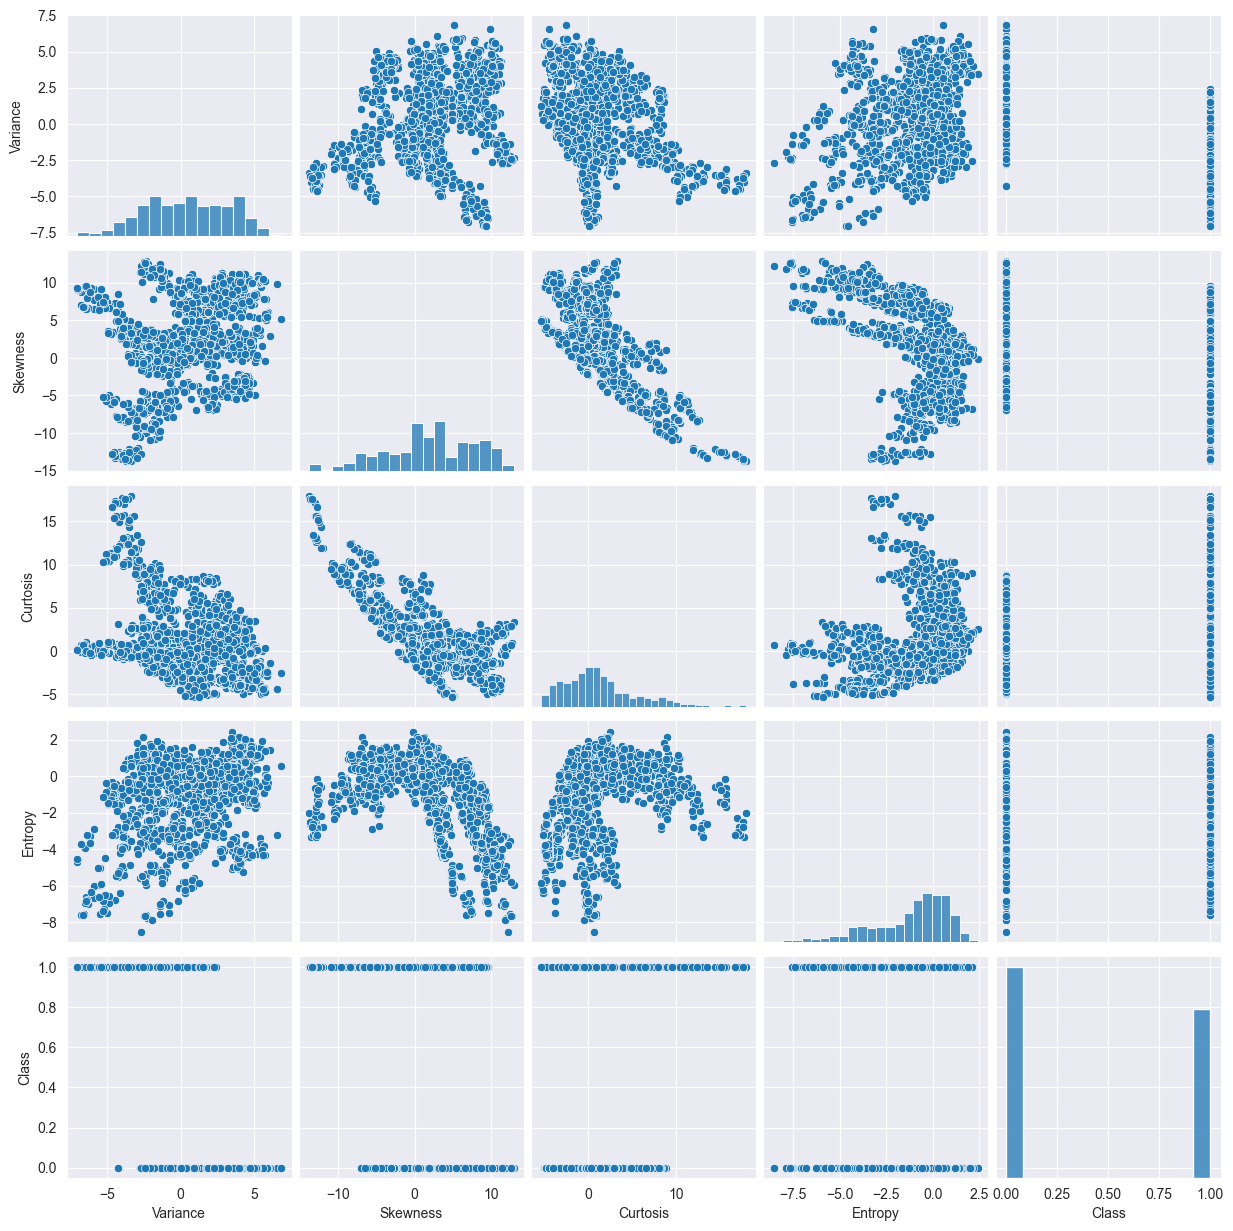

In [4]:
sns.pairplot(df)

In [5]:
x = df.drop(columns='Class')
y = df['Class']

spored pairplotot gledame deka ne se zavisni

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [8]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

In [9]:
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = tree.predict(x_test)

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       151
           1       0.98      1.00      0.99       124

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [12]:
print(confusion_matrix(y_test, y_pred))

[[149   2]
 [  0 124]]


In [13]:
print(accuracy_score(y_test, y_pred))

0.9927272727272727


# Visualize the tree

In [14]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
tree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [16]:
y_pred = tree.predict(x_test)

In [17]:
f1_score(y_test, y_pred)

0.9644268774703557

In [18]:
dot_data = StringIO()

In [19]:
export_graphviz(tree, out_file=dot_data, filled=True,rounded=True, feature_names=df.columns[:-1], class_names=['0','1'])